# <font color='#3d59c6'> MD004 SESIÓN MATRIZ COVARIANZA & ANOVA </font>

<font color='#3d59c6'>**OBJETIVO SESIÓN PRÁCTICA:**</font> observar si hay <font color='#C90076'>**diferencias significativas entre las medias de las categorias de nuestros factores en una o más variables dependientes.**</font> Nos ayudará a ver la variabilidad entre categorias y dentro de cada categoría, confirmando si las diferencias observadas son estadísticamente significativas o simplemente el resultado de la variabilidad aleatoria.

- **One-Way ANOVA:** estudia el **efecto de un solo factor (variable categórica) en una variable dependiente continua. Este factor puede tener dos o más categorías**. El objetivo es ver si hay diferencias significativas entre la variable dependiente y los diferentes niveles del factor.

- **Two-Way ANOVA:** estudia el **efecto de dos factores (variables categóricas) en una variable dependiente continua.**. Estos dos factores pueden tener un efecto independiente en la variable dependiente, y este test nos ayudará a ver si hay interacciones significativas entre los dos factores.

- **One-Way MANOVA:** se observa el efecto de **una variable categórica en múltiples variables dependientes continuas.**

- **Two-Way MANOVA:** observaremos el efecto de **dos variables categóricas en múltiples variables dependientes continuas.** El análisis permite ver cómo los diferentes grupos conjuntamente afectan las variables dependientes.

![alt text](https://media.istockphoto.com/vectors/crab-character-smiling-with-big-claws-on-a-white-vector-id1164392644?k=20&m=1164392644&s=612x612&w=0&h=IuXW-Gkz9VC-WLMBrtoICF7rK-gmChuAY-JWBMETxyQ= "Title")


<font color='#3d59c6'>**DATA**</font>: En este ejemplo utilizaremos el **dataset crabs** incluido en el package MASS >> https://stat.ethz.ch/R-manual/R-devel/library/MASS/html/crabs.html


- **sp:** especia "B" o "O" (blue o orange)
- **sex:** "F" o "M"
- **FL:** tamaño lóbulo frontal (mm)
- **RW:** tamaño parte trasera (mm)
- **CL:** longitus caparazón (mm)
- **CW:** anchura caparazón (mm)
- **BD:** altura caparazón (mm)
- **index:** índice por grupo [1,50]

<font color='#3d59c6'>**PASOS:**</font> 

0. Carga de Packages
1. Carga de datos
2. Realizar análisis descriptivo:
    - principales estadísticos
    - graficación
3. Análisis Matriz de Covarianza
4. Realización de Test:
    - One-Way ANOVA
    - Two-Way ANOVA
    - One-Way MANOVA
    - Two-Way MANOVA
5. Conclusión

## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

- **tidyverse:** esta librería nos será útil en todo el proceso del análisis descriptivo así como también, a la hora de manipular los datos. Engloba varias librerías como por ejemplo ggplot2 y dplyr (usados en la sesión anterior)
- **gridExtra:** con esta librería podremos organizar y personalizar nuestros gráficos, así como mapear varios gráficos en una única área
- **ggplot2**: la usamos para crear gráficos más personalizables o dicho de otra manera, podremos crear visualizaciones complejas.
- **GGally**: es una extensión de ggplot2 con funciones adicionales para crear matrices de gráficos, lo que facilita la exploración de relaciones entre múltiples variables.

In [2]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [3]:
library(MASS)
data_crab <- crabs


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [4]:
head(data_crab) # de forma predefinida retorna las primeras 6 observations
tail(data_crab) # de forma predefinida retorna las últimas 6 observations

sp sex index FL   RW  CL   CW   BD 
1 B  M   1      8.1 6.7 16.1 19.0 7.0
2 B  M   2      8.8 7.7 18.1 20.8 7.4
3 B  M   3      9.2 7.8 19.0 22.4 7.7
4 B  M   4      9.6 7.9 20.1 23.1 8.2
5 B  M   5      9.8 8.0 20.3 23.0 8.2
6 B  M   6     10.8 9.0 23.0 26.5 9.8

sp sex index FL   RW   CL   CW   BD  
195 O  F   45    21.3 18.4 43.8 48.4 20.0
196 O  F   46    21.4 18.0 41.2 46.2 18.7
197 O  F   47    21.7 17.1 41.7 47.2 19.6
198 O  F   48    21.9 17.2 42.6 47.4 19.5
199 O  F   49    22.5 17.2 43.0 48.7 19.8
200 O  F   50    23.1 20.2 46.2 52.5 21.1

In [5]:
dim(data_crab)

[1] 200   8

In [6]:
str(data_crab)

'data.frame':	200 obs. of  8 variables:
 $ sp   : Factor w/ 2 levels "B","O": 1 1 1 1 1 1 1 1 1 1 ...
 $ sex  : Factor w/ 2 levels "F","M": 2 2 2 2 2 2 2 2 2 2 ...
 $ index: int  1 2 3 4 5 6 7 8 9 10 ...
 $ FL   : num  8.1 8.8 9.2 9.6 9.8 10.8 11.1 11.6 11.8 11.8 ...
 $ RW   : num  6.7 7.7 7.8 7.9 8 9 9.9 9.1 9.6 10.5 ...
 $ CL   : num  16.1 18.1 19 20.1 20.3 23 23.8 24.5 24.2 25.2 ...
 $ CW   : num  19 20.8 22.4 23.1 23 26.5 27.1 28.4 27.8 29.3 ...
 $ BD   : num  7 7.4 7.7 8.2 8.2 9.8 9.8 10.4 9.7 10.3 ...


El dataset para este caso práctico consta de 200 observaciones con un total de 8 variables, siendo 2 de ellas factores (categóricas) y una de identificador.

### <font color='#3d59c6'>  1.1 ¿Qué diferencias hay entre las variables tipo `character` y `factor`? </font>

#### 1. Definición y Propósito
- **`character`**: Representa texto plano utilizado para almacenar cadenas de caracteres.
- **`factor`**: Representa una variable categórica con niveles únicos y puede ser ordenada o no ordenada.

#### 2. Almacenamiento Interno
- **`character`**: Cada valor se almacena como una cadena de texto completa.
- **`factor`**: Los valores se almacenan como enteros asociados a etiquetas llamadas niveles.

#### 3. Uso en Modelos Estadísticos
- **`character`**: No se interpreta como variable categórica automáticamente.
- **`factor`**: Es esencial para variables categóricas en modelos estadísticos, ya que permite aplicar codificación de niveles (dummy encoding).

#### 4. Orden y Jerarquía
- **`character`**: No tiene un orden inherente; se trata como texto.
- **`factor`**: Puede tener un orden explícito definido, útil para variables ordinales.

#### 5. Operaciones y Comparaciones
- **`character`**: Las comparaciones como `<` o `>` siguen el orden alfabético.
- **`factor`**: Comparaciones son válidas solo para factores ordenados, respetando los niveles definidos.

#### 6. Visualización
- **`character`**: Se trata como texto en gráficos y no organiza los datos por categorías.
- **`factor`**: Se interpreta como categorías, organizando los ejes y agrupaciones según los niveles.

#### 7. Uso de `character` en ANOVA/MANOVA
- R puede convertir variables `character` a factores implícitamente, pero esto puede generar niveles incorrectos o desordenados.
- No es una práctica recomendada, ya que puede afectar la interpretación y los resultados.

#### 8. Uso de `factor` en ANOVA/MANOVA
- Permite definir explícitamente los niveles y el orden de las categorías.
- Esencial para que R particione correctamente los datos en grupos y realice análisis adecuados.

#### 9. Práctica Recomendada
- Convierte siempre variables categóricas a factores antes de usarlas en ANOVA/MANOVA.
- Define niveles explícitos con el argumento `levels` para garantizar resultados precisos.
- Verifica los niveles con `levels()` para evitar errores de interpretación.


## <font color='#3d59c6'>  2. REALIZAR ANÁLISIS DESCRIPTIVO </font>

### <font color='#3d59c6'>  2.1 Variables numéricas </font>

Iniciamos la parte descriptiva de las variables numéricas, para ello filtramos las de nuestro interés

In [7]:
data_crab_numericas <- data_crab %>%
  select_if(is.numeric)
data_crab_numericas <- data_crab_numericas[, c("FL", "RW", "CL", "CW", "BD")]
head(data_crab_numericas)

FL   RW  CL   CW   BD 
1  8.1 6.7 16.1 19.0 7.0
2  8.8 7.7 18.1 20.8 7.4
3  9.2 7.8 19.0 22.4 7.7
4  9.6 7.9 20.1 23.1 8.2
5  9.8 8.0 20.3 23.0 8.2
6 10.8 9.0 23.0 26.5 9.8

In [8]:
summary(data_crab_numericas)

       FL              RW              CL              CW       
 Min.   : 7.20   Min.   : 6.50   Min.   :14.70   Min.   :17.10  
 1st Qu.:12.90   1st Qu.:11.00   1st Qu.:27.27   1st Qu.:31.50  
 Median :15.55   Median :12.80   Median :32.10   Median :36.80  
 Mean   :15.58   Mean   :12.74   Mean   :32.11   Mean   :36.41  
 3rd Qu.:18.05   3rd Qu.:14.30   3rd Qu.:37.23   3rd Qu.:42.00  
 Max.   :23.10   Max.   :20.20   Max.   :47.60   Max.   :54.60  
       BD       
 Min.   : 6.10  
 1st Qu.:11.40  
 Median :13.90  
 Mean   :14.03  
 3rd Qu.:16.60  
 Max.   :21.60  

In [9]:
data_crab_numericas %>%
  summarize(
    m_FL = mean(FL), sd_FL = sd(FL) # calculating the mean and standard deviation for each metric
    , m_RW = mean(RW), sd_RW = sd(RW),
    m_CL = mean(CL), sd_CL = sd(CL),
    m_CW = mean(CW), sd_CW = sd(CW),
    m_BD = mean(BD), sd_BD = sd(BD)
  )

m_FL   sd_FL    m_RW    sd_RW   m_CL    sd_CL    m_CW    sd_CW    m_BD   
1 15.583 3.495325 12.7385 2.57334 32.1055 7.118983 36.4145 7.871955 14.0305
  sd_BD   
1 3.424772

Vemos que ninguna de las variables ha llegado con datos nulos. También podemos ver que para nuestras 5 variables, mediana y media son cercanas en valor, cosa que nos indica baja dispersión.
Podemos comprobar, a partir de las medias, que los cangrejos son más anchos que largos.

In [10]:
data_crab_summary <- data_crab %>%
  group_by(sp) %>%
  summarize(
    m_FL = mean(FL), sd_FL = sd(FL),
    m_RW = mean(RW), sd_RW = sd(RW),
    m_CL = mean(CL), sd_CL = sd(CL),
    m_CW = mean(CW), sd_CW = sd(CW),
    m_BD = mean(BD), sd_BD = sd(BD)
  )

diff_row <- data_crab_summary %>%
  summarise(
    sp = "diff_sp",
    m_FL = diff(m_FL), sd_FL = diff(sd_FL), # diff: calculan las diferencias entre valores consecutivos
    m_RW = diff(m_RW), sd_RW = diff(sd_RW),
    m_CL = diff(m_CL), sd_CL = diff(sd_CL),
    m_CW = diff(m_CW), sd_CW = diff(sd_CW),
    m_BD = diff(m_BD), sd_BD = diff(sd_BD)
  )

data_crab_summary <- bind_rows(data_crab_summary, diff_row)
data_crab_summary

sp      m_FL   sd_FL     m_RW   sd_RW    m_CL   sd_CL      m_CW   sd_CW     
1 B       14.056 3.0196100 11.928 2.279291 30.058  6.9027030 34.717  7.8660382
2 O       17.110 3.2755754 13.549 2.605530 34.153  6.7642622 38.112  7.5409224
3 diff_sp  3.054 0.2559654  1.621 0.326239  4.095 -0.1384408  3.395 -0.3251157
  m_BD   sd_BD     
1 12.583 3.06788694
2 15.478 3.15148129
3  2.895 0.08359435

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


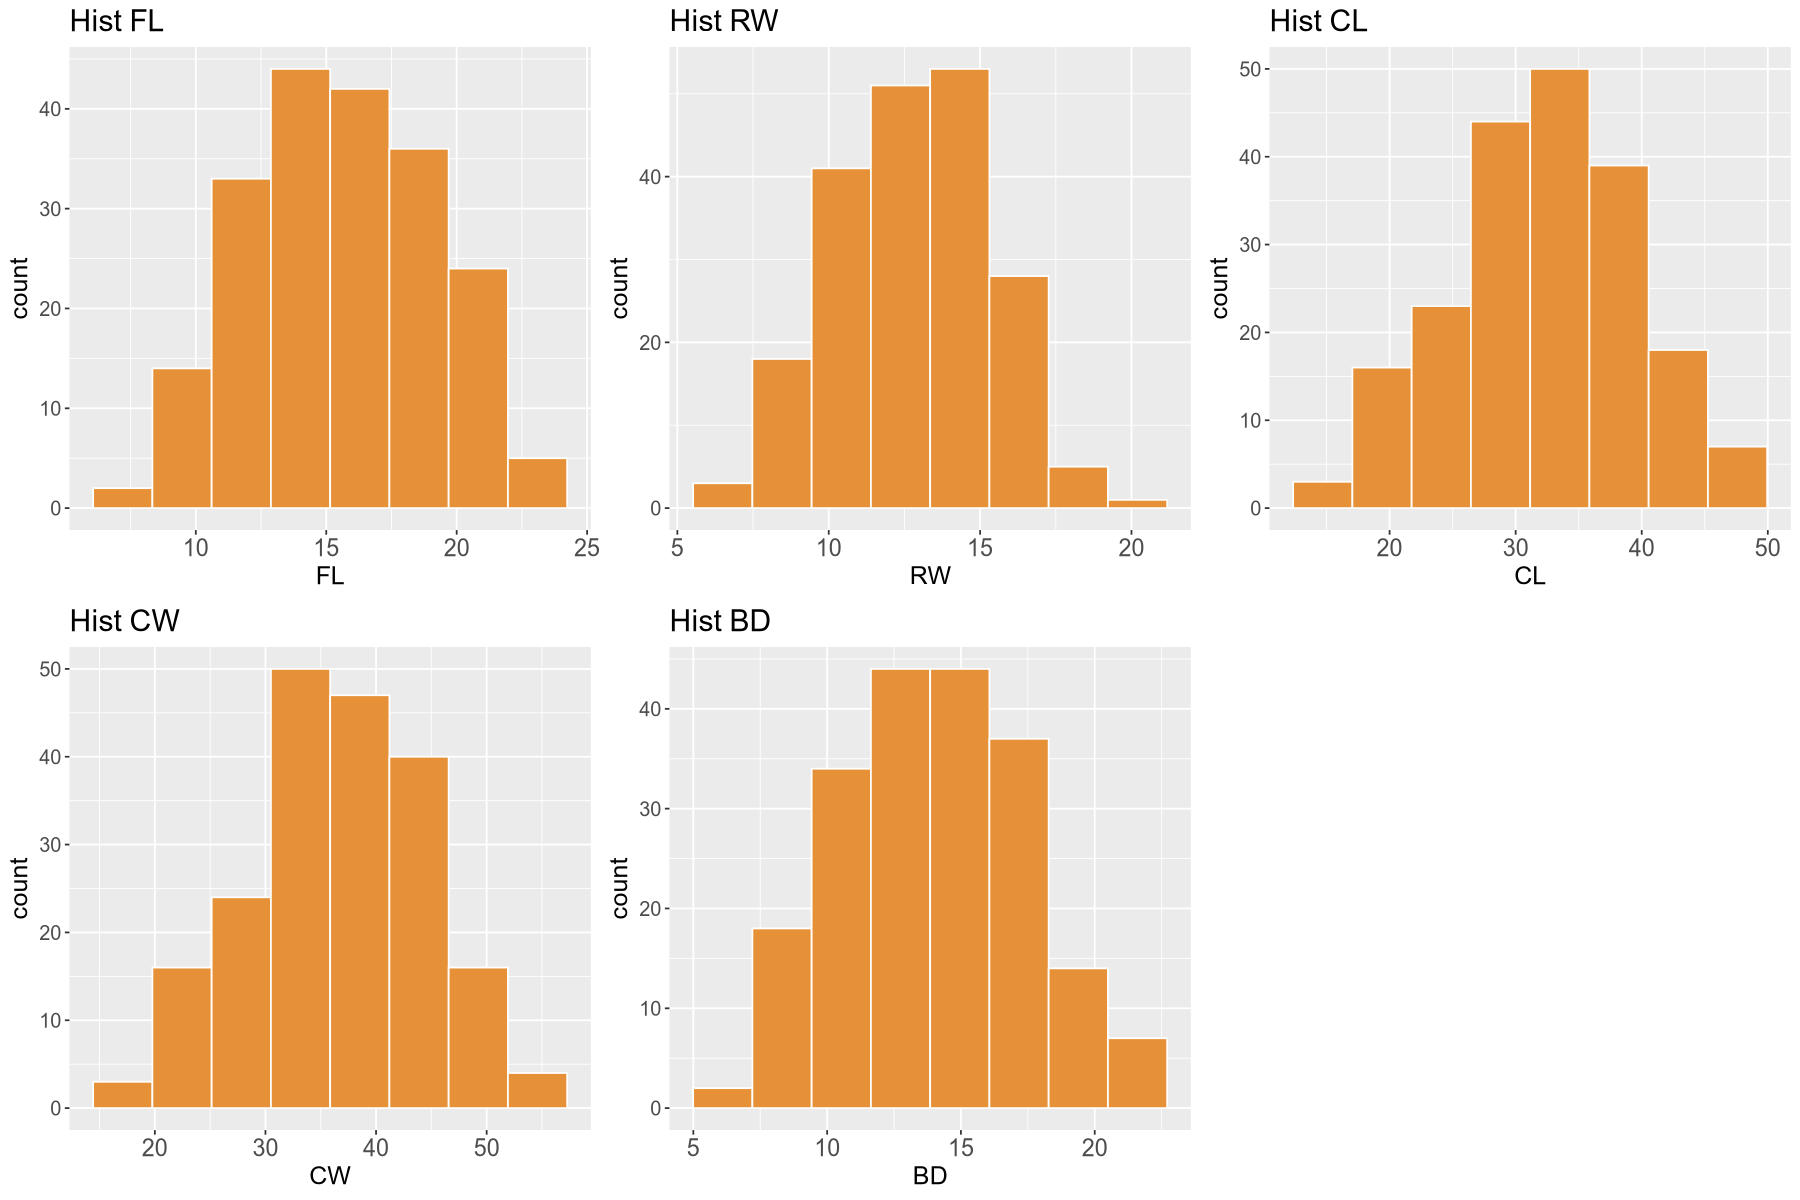

In [11]:
# Crear una lista vacía para almacenar los gráficos de histogramas
graficos_histograma <- list()

# Obtener los nombres de las columnas del conjunto de datos `data_crab_numericas`
var_data <- colnames(data_crab_numericas)

# Bucle para generar un histograma por cada variable numérica en el conjunto de datos
for (variable in var_data) {
  # Crear el histograma para la variable actual usando ggplot2
  grafico <- ggplot(data_crab_numericas) + # Iniciar el gráfico usando el conjunto de datos
    aes_string(x = variable) + # Asignar la variable actual al eje X
    geom_histogram( # Agregar el histograma
      bins = 8, # Dividir los datos en 8 bins
      fill = "#e69138", # Color de relleno de los bins
      color = "white", # Color de los bordes de los bins
      na.rm = TRUE # Ignorar valores NA en los datos
    ) +
    theme( # Ajustar el estilo de los textos
      text = element_text(size = 15), # Tamaño del texto general
      axis.text.x = element_text(size = 14) # Tamaño del texto del eje X
    ) +
    labs(title = paste("Hist", variable)) # Título dinámico para el histograma

  # Agregar el gráfico a la lista de histogramas
  graficos_histograma[[length(graficos_histograma) + 1]] <- grafico
}

# Configurar el tamaño de los gráficos para la representación final
options(
  repr.plot.width = 15, # Ancho de los gráficos
  repr.plot.height = 10 # Altura de los gráficos
)

# Mostrar todos los histogramas en un grid con 3 columnas
do.call("grid.arrange", c(graficos_histograma, ncol = 3))

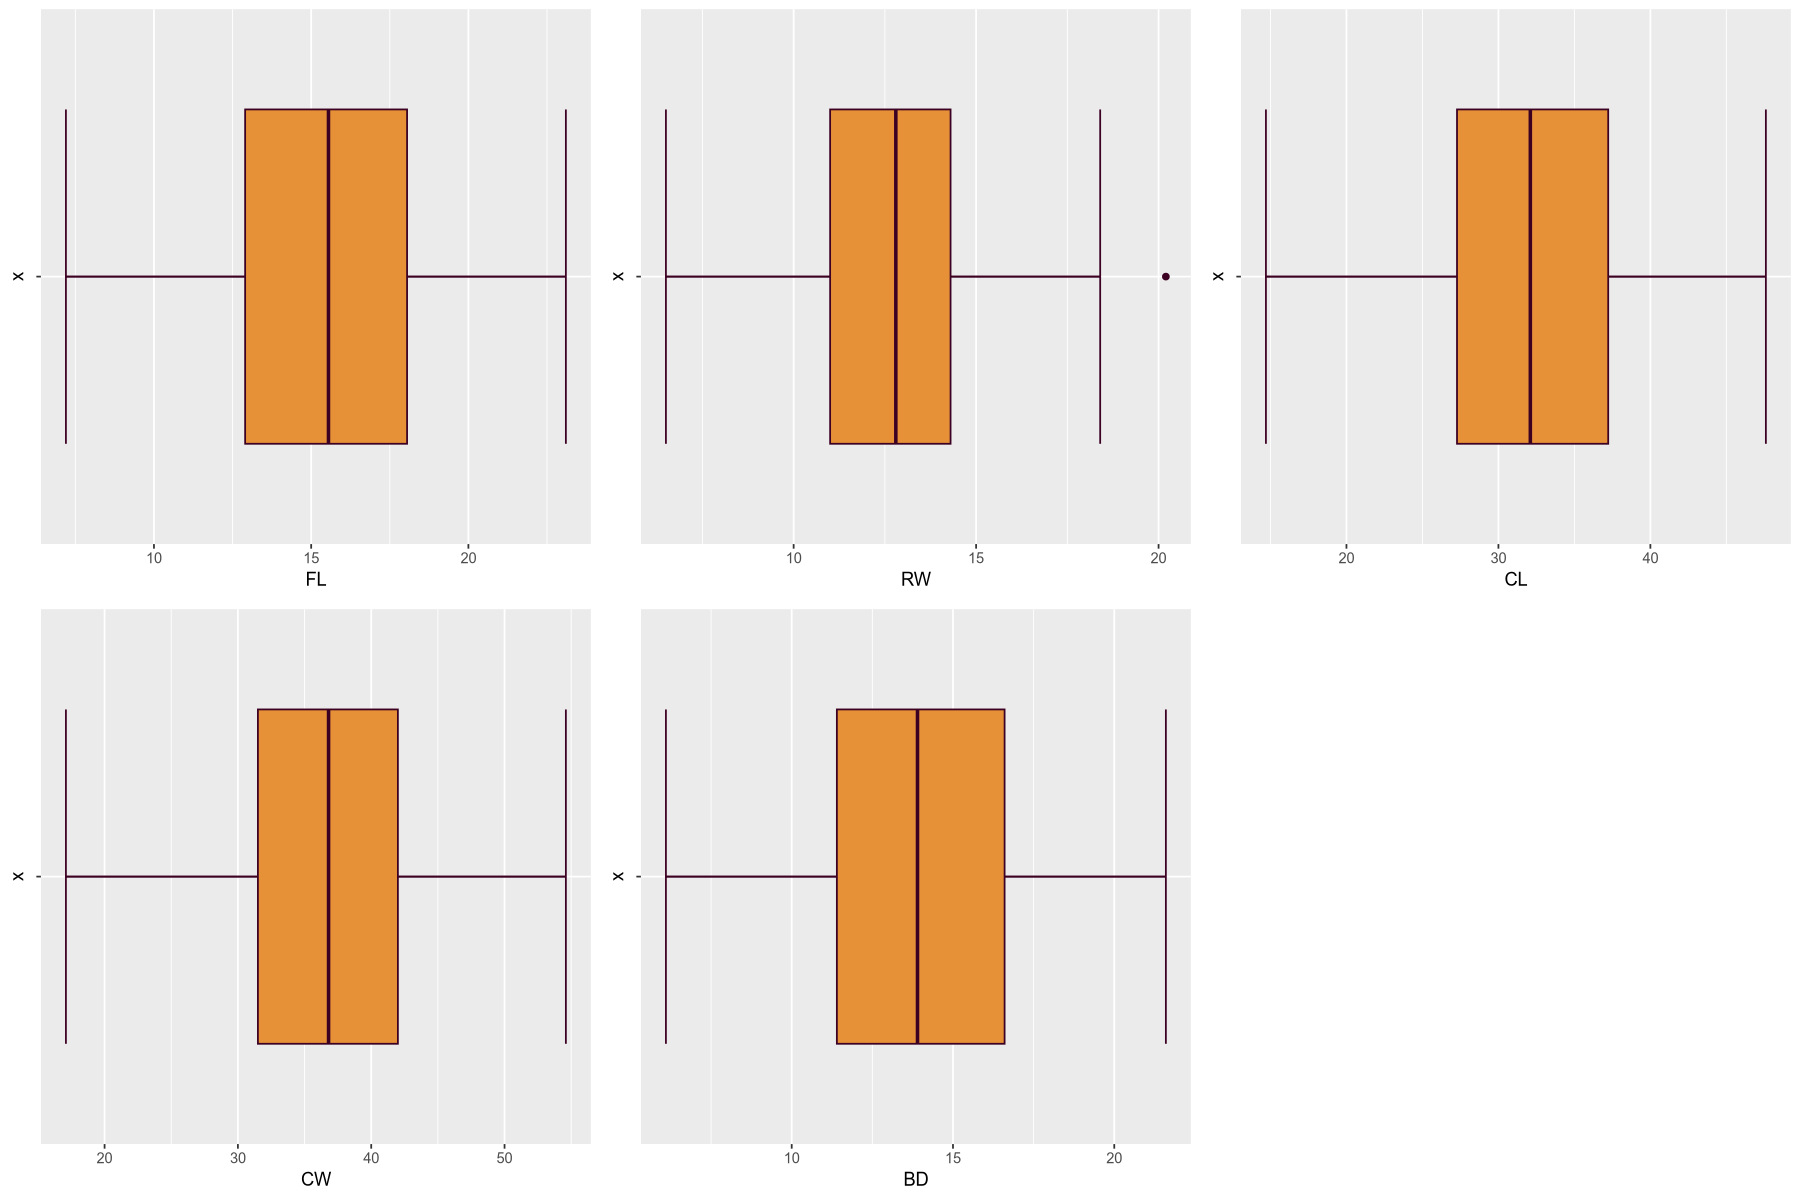

In [12]:
# Crear una lista vacía para almacenar los gráficos de boxplot
box_plots <- list()

# Obtener los nombres de las columnas del conjunto de datos `data_crab_numericas`
var_data <- colnames(data_crab_numericas)

# Bucle para generar un boxplot por cada variable numérica en el conjunto de datos
for (variable in var_data) {
  # Crear el boxplot para la variable actual usando ggplot2
  box_plot <- ggplot(data_crab_numericas, aes(x = "", y = !!sym(variable))) + # Asignar la variable al eje Y
    stat_boxplot( # Agregar barra de error
      geom = "errorbar", # Tipo de geom para las barras de error
      color = "#3c0023", # Color de las barras de error
      na.rm = TRUE # Ignorar valores NA
    ) +
    geom_boxplot( # Agregar el boxplot
      fill = "#e69138", # Color de relleno del boxplot
      color = "#3c0023", # Color de borde del boxplot
      na.rm = TRUE # Ignorar valores NA
    ) +
    coord_flip() # Girar el boxplot horizontalmente
  labs( # Personalizar el título y el eje Y
    title = paste("Boxplot", variable), # Título del gráfico
    y = variable # Etiqueta del eje Y
  ) +
    theme( # Personalizar el tema
      panel.background = element_rect(fill = "lightgray"), # Fondo del panel
      panel.grid.major = element_line(color = "white"), # Línea de la cuadrícula principal
      panel.grid.minor = element_line(color = "white"), # Línea de la cuadrícula secundaria
      text = element_text(size = 12) # Tamaño del texto
    )

  # Agregar el gráfico a la lista con el nombre de la variable como clave
  box_plots[[variable]] <- box_plot
}

# Configurar el tamaño de los gráficos para la representación final
options(
  repr.plot.width = 15, # Ancho de los gráficos
  repr.plot.height = 10 # Altura de los gráficos
)

# Mostrar todos los boxplots en una cuadrícula con 3 columnas
grid.arrange(
  grobs = box_plots, # Lista de gráficos
  ncol = 3, # Número de columnas en la cuadrícula
  widths = rep(2, 3) # Ancho relativo de las columnas
)

Tanto observando los histogramas como los boxplots, vemos que nuestras variables siguen una distribución normal y solo en el caso de la variable RW se observa un registro con valor extremo (fuera de los bigotes)

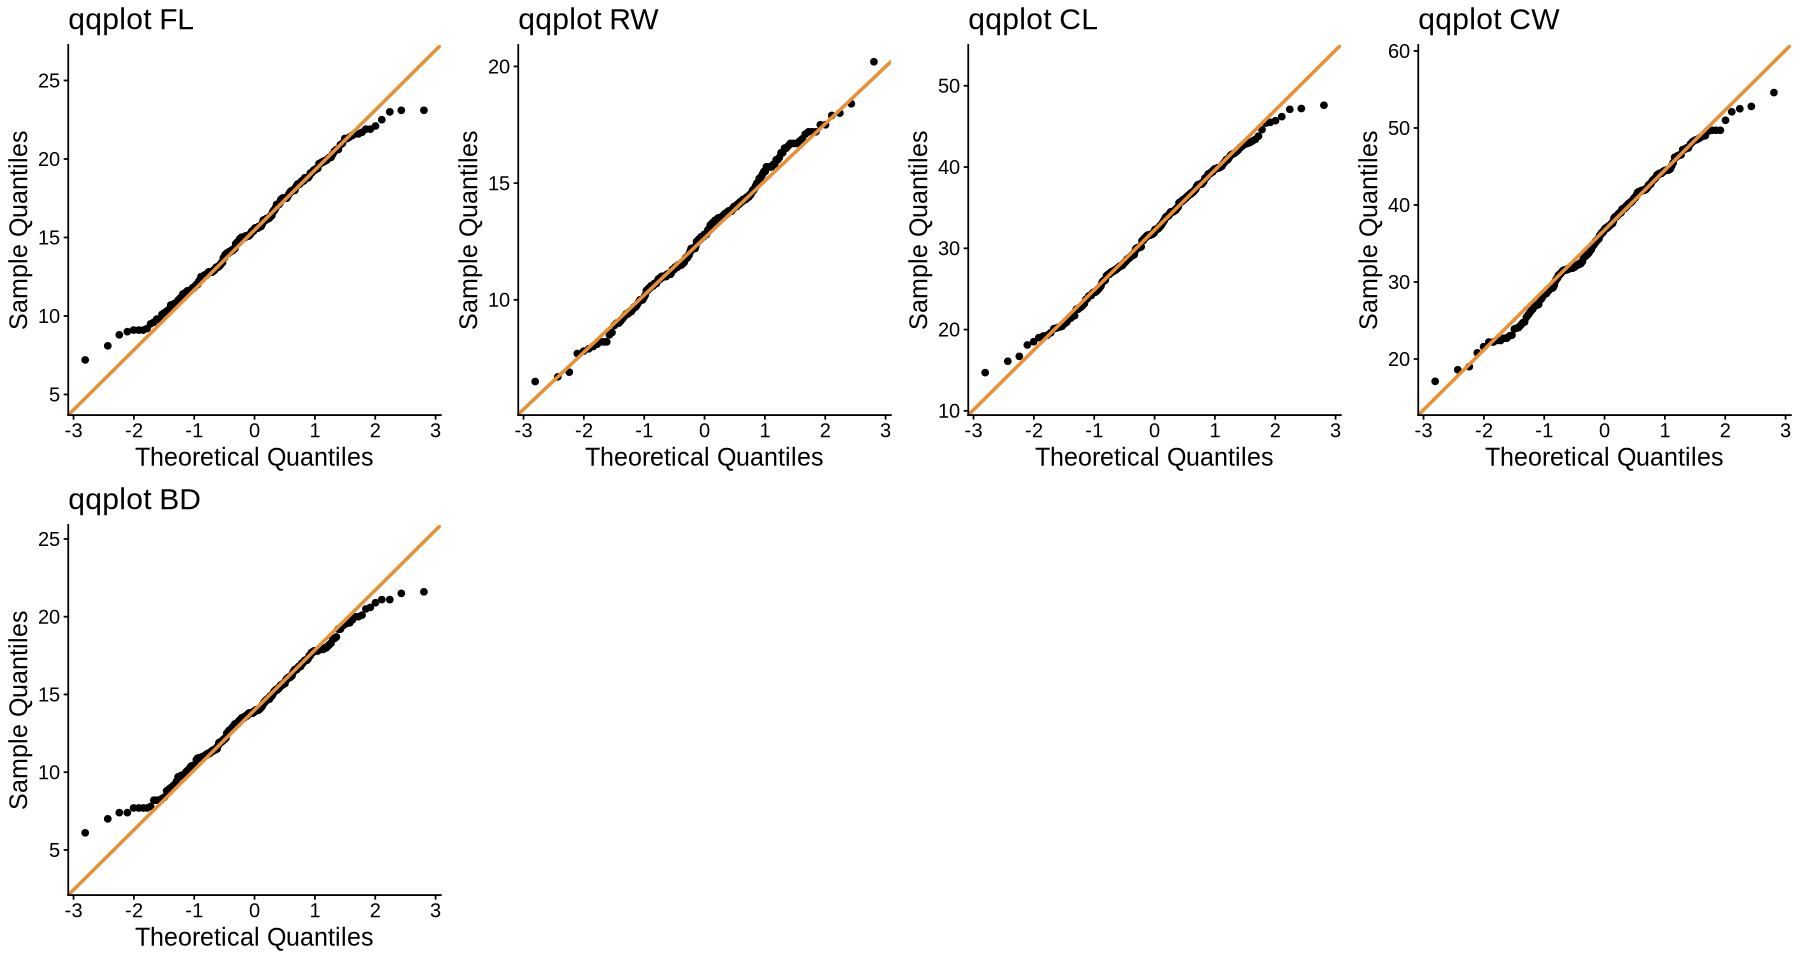

In [12]:
# Configurar el tamaño de los gráficos para la representación final
options(
  repr.plot.width = 15, # Ancho total de la visualización
  repr.plot.height = 8 # Altura total de la visualización
)

# Crear una lista vacía para almacenar los gráficos Q-Q
qq_plots <- list()

# Obtener los nombres de las columnas del conjunto de datos `data_crab_numericas`
var_data <- colnames(data_crab_numericas)

# Bucle para generar un Q-Q plot por cada variable numérica en el conjunto de datos
for (i in seq_along(var_data)) {
  # Obtener el nombre de la variable actual
  variable <- var_data[i]

  # Crear el Q-Q plot para la variable actual
  qq_plot <- ggplot(
    # Filtrar filas con valores no NA para la variable actual
    data_crab_numericas[!is.na(data_crab_numericas[[variable]]), ],
    aes(sample = !!sym(variable)) # Asignar la variable actual al eje de muestra
  ) +
    stat_qq() + # Agregar los puntos del Q-Q plot
    stat_qq_line(color = "#e69138", lwd = 1) + # Agregar la línea teórica de referencia
    labs( # Personalizar etiquetas y título
      title = paste("qqplot", variable), # Título del gráfico
      x = "Theoretical Quantiles", # Etiqueta del eje X
      y = "Sample Quantiles" # Etiqueta del eje Y
    ) +
    theme_classic() + # Usar un tema clásico para el diseño
    theme( # Ajustar el estilo del texto
      text = element_text(size = 15) # Tamaño del texto
    )

  # Agregar el gráfico a la lista de Q-Q plots
  qq_plots[[i]] <- qq_plot
}

# Mostrar todos los Q-Q plots en una cuadrícula con 4 columnas
grid.arrange(
  grobs = qq_plots, # Lista de gráficos
  ncol = 4, # Número de columnas en la cuadrícula
  widths = rep(2, 4) # Anchos iguales para cada columna
)

Como adelantabamos anteriormente nuestras variables aparentemente siguen una distribución normal.

### <font color='#3d59c6'>  2.2 Variables categóricas </font>

In [13]:
# descarto la varaible ID para este análisis
data_crab_cat <- data_crab %>%
  select_if(is.factor)
head(data_crab_cat)

sp sex
1 B  M  
2 B  M  
3 B  M  
4 B  M  
5 B  M  
6 B  M

In [14]:
col_crab_cat <- c("sp", "sex")
null_counts <- colSums(is.na(data_crab_cat[, col_crab_cat]))
print(data.frame(Nulos = null_counts))

    Nulos
sp      0
sex     0


In [15]:
num_categorias <- sapply(data_crab_cat, function(x) nlevels(x))
print(num_categorias)

 sp sex 
  2   2 


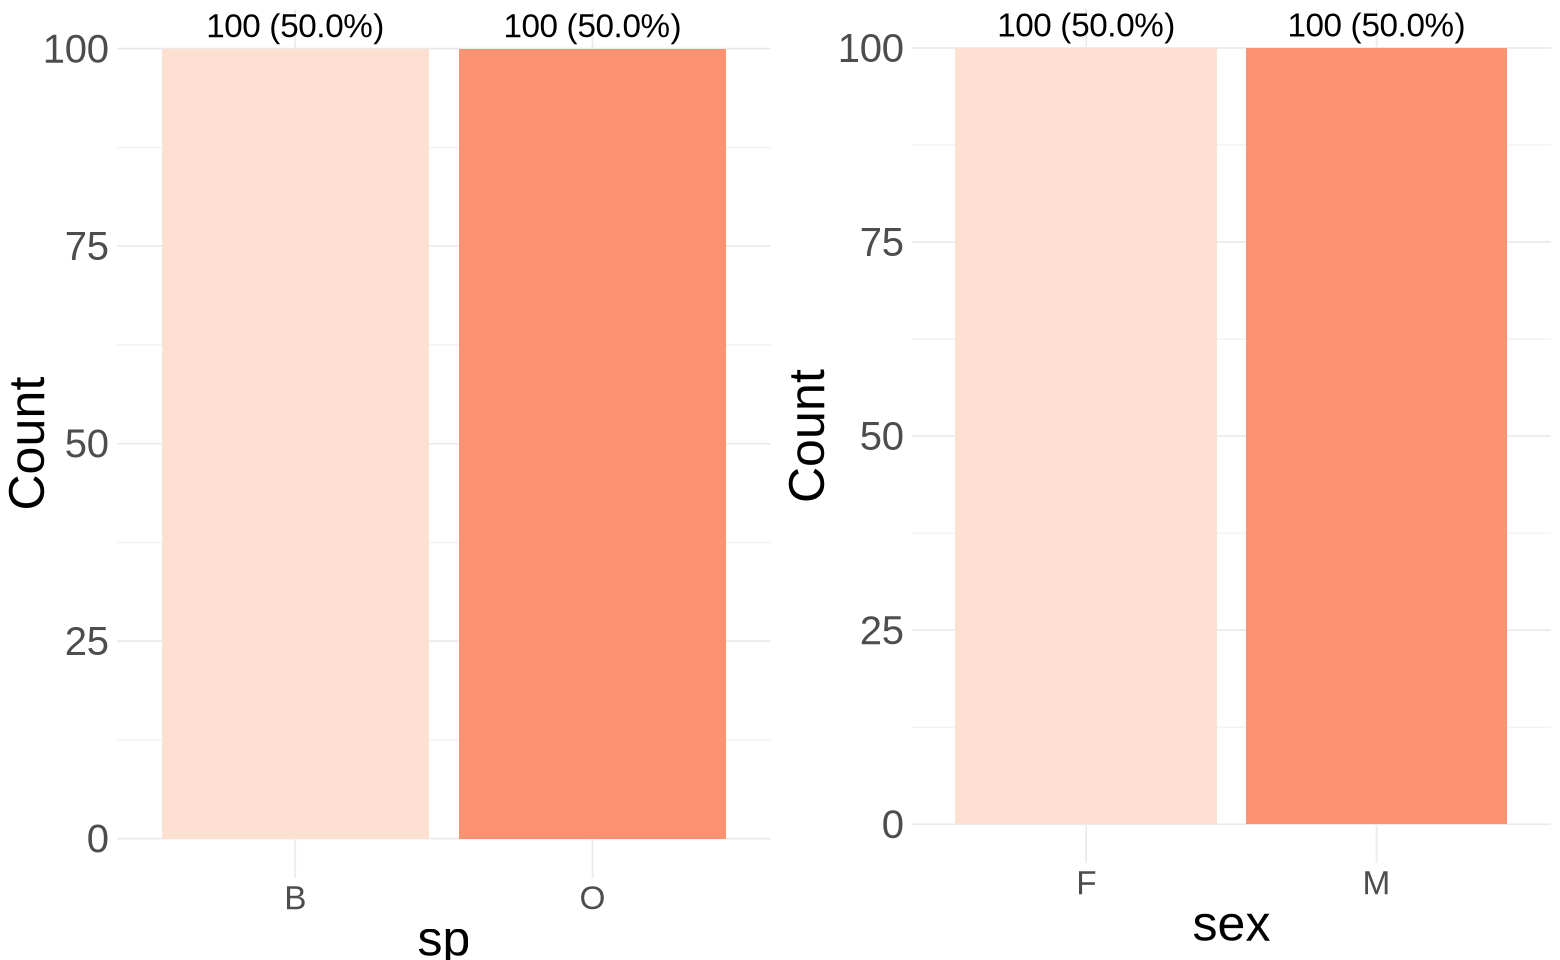

In [16]:
# Configurar el tamaño de los gráficos para la representación final
options(
  repr.plot.width = 13, # Ancho total de la visualización
  repr.plot.height = 8 # Altura total de la visualización
)

# Crear una lista vacía para almacenar los gráficos de barras
bar_plots <- list()

# Filtrar las columnas categóricas del conjunto de datos `data_crab_cat`
var_data_cat_list <- data_crab_cat[col_crab_cat] # Subconjunto de columnas categóricas
var_data_cat <- lapply(var_data_cat_list, list) # Convertir las columnas categóricas en listas

# Bucle para generar un gráfico de barras por cada variable categórica
for (variable in names(var_data_cat)) {
  # Crear el gráfico de barras para la variable actual
  bar_plot <- ggplot(data_crab_cat, aes(x = !!sym(variable), fill = as.factor(!!sym(variable)))) +
    geom_bar( # Crear barras
      stat = "count", # Conteo de frecuencias
      position = "dodge" # Barras alineadas lado a lado
    ) +
    scale_fill_brewer(palette = "Reds") + # Usar una paleta de colores "Reds"
    labs( # Etiquetas de los ejes
      x = variable, # Nombre de la variable en el eje X
      y = "Count" # Etiqueta del eje Y
    ) +
    theme_minimal() + # Usar un tema minimalista
    theme( # Personalizar el tema
      legend.position = "none", # Ocultar la leyenda
      text = element_text(size = 30), # Tamaño del texto general
      axis.text.x = element_text(size = 20) # Tamaño del texto del eje X
    ) +
    geom_text( # Agregar etiquetas con conteos y porcentajes
      stat = "count", # Basado en los conteos de las barras
      aes( # Formato de las etiquetas
        label = sprintf(
          "%d (%.1f%%)", # Formato: conteo y porcentaje
          after_stat(count),
          after_stat(count) / sum(after_stat(count)) * 100
        )
      ),
      position = position_dodge(0.9), # Posición ajustada para evitar solapamientos
      vjust = -0.5, # Separación vertical de las etiquetas
      size = 7 # Tamaño del texto de las etiquetas
    )

  # Agregar el gráfico a la lista con el nombre de la variable como clave
  bar_plots[[variable]] <- bar_plot
}

# Mostrar todos los gráficos de barras en una cuadrícula con 2 columnas
grid.arrange(
  grobs = bar_plots, # Lista de gráficos
  ncol = 2, # Número de columnas en la cuadrícula
  widths = rep(1, 2) # Anchos iguales para las columnas
)

Tal y como se esperaba, tenemos una distribución por categorias balanceada 50%.

## <font color='#3d59c6'>  3. ANÁLISIS MATRIZ COVARIANZAS </font>

In [17]:
round(cov(data_crab_numericas), 3)

FL     RW     CL     CW     BD    
FL 12.217  8.158 24.357 26.551 11.823
RW  8.158  6.622 16.355 18.240  7.837
CL 24.357 16.355 50.680 55.761 23.971
CW 26.551 18.240 55.761 61.968 26.092
BD 11.823  7.837 23.971 26.092 11.729

In [18]:
round(cor(data_crab_numericas), 3)

FL    RW    CL    CW    BD   
FL 1.000 0.907 0.979 0.965 0.988
RW 0.907 1.000 0.893 0.900 0.889
CL 0.979 0.893 1.000 0.995 0.983
CW 0.965 0.900 0.995 1.000 0.968
BD 0.988 0.889 0.983 0.968 1.000

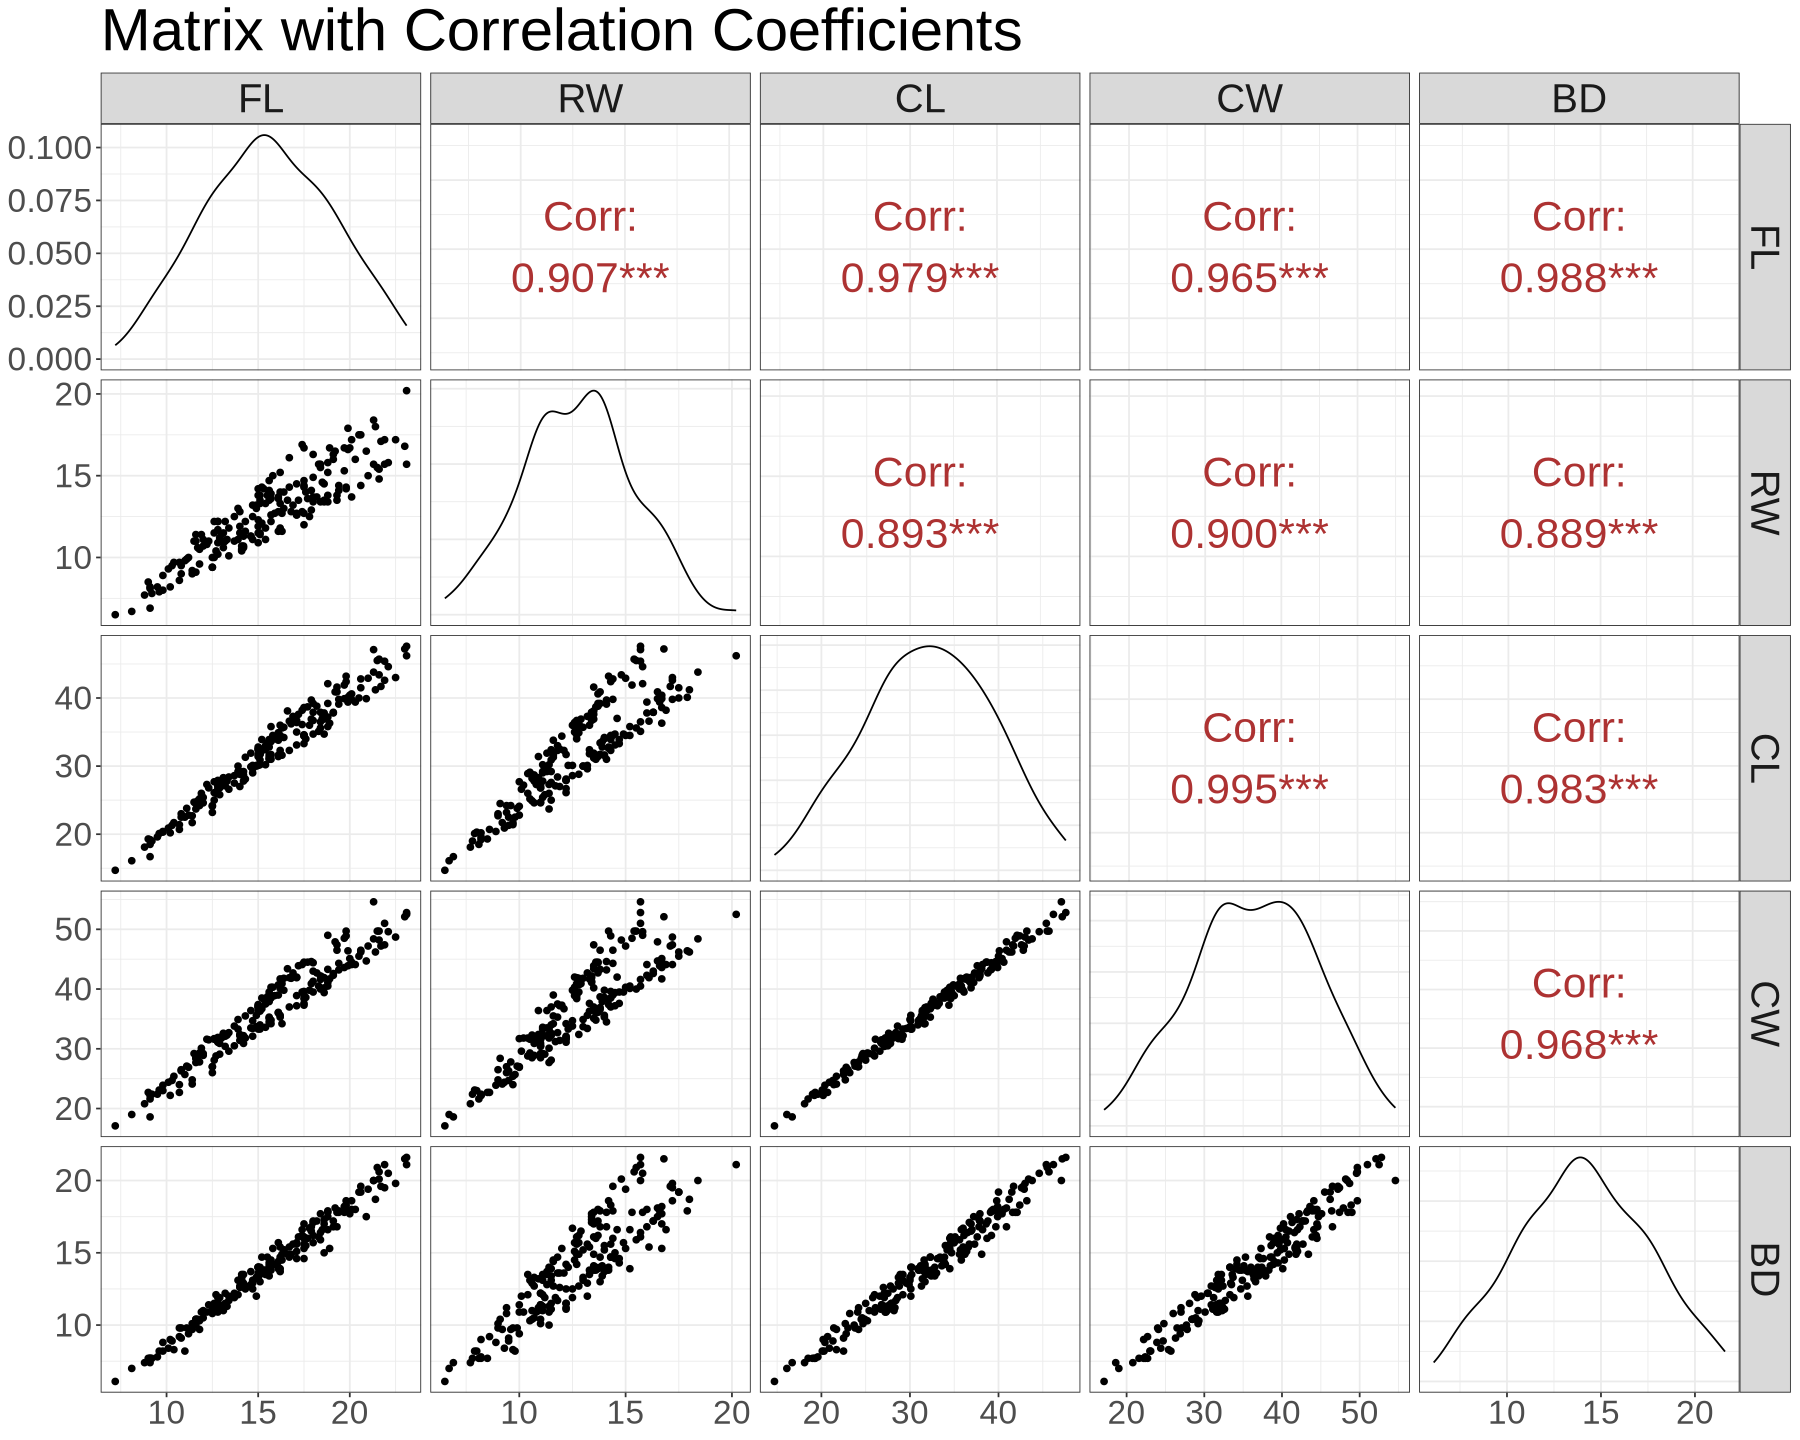

In [19]:
# Configurar el tamaño de los gráficos para la representación final
options(
  repr.plot.width = 15, # Ancho total de la matriz
  repr.plot.height = 12 # Altura total de la matriz
)

# Generar la matriz de gráficos de pares
ggpairs(
  data_crab_numericas, # Conjunto de datos con columnas numéricas
  title = "Matrix with Correlation Coefficients", # Título de la matriz
  upper = list(
    continuous = wrap( # Configurar la sección superior de la matriz
      "cor", # Mostrar coeficientes de correlación
      size = 9, # Tamaño del texto de correlación
      color = "#ad3232" # Color del texto de correlación
    )
  )
) +
  theme_bw() + # Aplicar un tema en blanco y negro
  theme( # Personalizar el tema
    text = element_text(size = 30), # Tamaño del texto general
    axis.text = element_text(size = 20), # Tamaño del texto en los ejes
    axis.title = element_text(size = 25) # Tamaño de los títulos de los ejes
  )

Nuestras varaibles continuas estan altamente relacionadas entre ellas, ninguno de los valores es inferior a 0.850

## <font color='#3d59c6'>  4. REALIZAR TEST ANOVA </font>

### COMPROVACIÓN DE SUPUESTOS

- **Independencia en las muestras**: muestras tomadas de forma independiente sin depende de ninguna otra observación. 
- **Distribución normal** por categorías
- **Homocedasticidad** entre grupos

#### NORMALIDAD factor sex

In [20]:
variables <- c("FL", "RW", "CL", "CW", "BD")
categorias <- c("F", "M")
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset <- subset(data_crab, sex == cat)
    result <- shapiro.test(data_subset[, variable])
    resultados <- rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

   Variable Cat   Shapiro PValor
W        FL   F 0.9878044  0.494
W1       FL   M 0.9901912  0.680
W2       RW   F 0.9877349  0.489
W3       RW   M 0.9868050  0.425
W4       CL   F 0.9881811  0.522
W5       CL   M 0.9859451  0.371
W6       CW   F 0.9882339  0.526
W7       CW   M 0.9832703  0.237
W8       BD   F 0.9878240  0.495
W9       BD   M 0.9872515  0.455


#### NORMALIDAD factor especie

In [21]:
variables <- c("FL", "RW", "CL", "CW", "BD")
categorias <- c("B", "O")
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset <- subset(data_crab, sp == cat)
    result <- shapiro.test(data_subset[, variable])
    resultados <- rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

   Variable Cat   Shapiro PValor
W        FL   B 0.9878737  0.499
W1       FL   O 0.9810078  0.159
W2       RW   B 0.9890437  0.588
W3       RW   O 0.9929942  0.888
W4       CL   B 0.9901221  0.674
W5       CL   O 0.9886292  0.556
W6       CW   B 0.9906168  0.714
W7       CW   O 0.9868771  0.429
W8       BD   B 0.9845281  0.294
W9       BD   O 0.9862709  0.390


#### HOMOCEDASTICIDAD factor sex

- $H_{0}$: las muestras presentan varianzas iguales
- $H_{1}$: las muestras presentan varianzas distintas

In [22]:
variables <- c("FL", "RW", "CL", "CW", "BD")
resultados_bartlett <- data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett <- bartlett.test(get(variable) ~ sex, data = data_crab)
  resultados_bartlett <- rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                      Variable Estadistico     PValor
Bartlett's K-squared        FL  0.04467358 0.83260539
Bartlett's K-squared1       RW  5.52181303 0.01878078
Bartlett's K-squared2       CL  1.15737428 0.28201076
Bartlett's K-squared3       CW  1.43852733 0.23037780
Bartlett's K-squared4       BD  0.19215457 0.66112941


#### HOMOCEDASTICIDAD factor especie

In [23]:
variables <- c("FL", "RW", "CL", "CW", "BD")
resultados_bartlett <- data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett <- bartlett.test(get(variable) ~ sp, data = data_crab)
  resultados_bartlett <- rbind(resultados_bartlett, data.frame(
    Variable = variable,
    Estadistico = resultado_bartlett$statisti,
    PValor = resultado_bartlett$p.value
  ))
}

print(resultados_bartlett)

                      Variable Estadistico    PValor
Bartlett's K-squared        FL  0.65140803 0.4196097
Bartlett's K-squared1       RW  1.75745669 0.1849421
Bartlett's K-squared2       CL  0.04042885 0.8406444
Bartlett's K-squared3       CW  0.17544839 0.6753144
Bartlett's K-squared4       BD  0.07118174 0.7896239


### <font color='#3d59c6'>  4.1 One-Way ANOVA </font>

Análisis de Varianza (ANOVA): técnica estadística que se utiliza para evaluar si existen diferencias significativas entre las medias de diferentes grupos, considerando la variabilidad tanto dentro de cada grupo como entre los grupos

- $H_{0}$: No existen diferencias significativas entre las medias de los grupos
- $H_{1}$: Existen diferencian significativas entre las medias de los grupos

A partir de este punto vamos a centrarnos en si existe diferencia entre los grupos definidos por nuestro factor 'especie' (este mismo trabajo se debería realizar para género si fuese de nuestro interés)

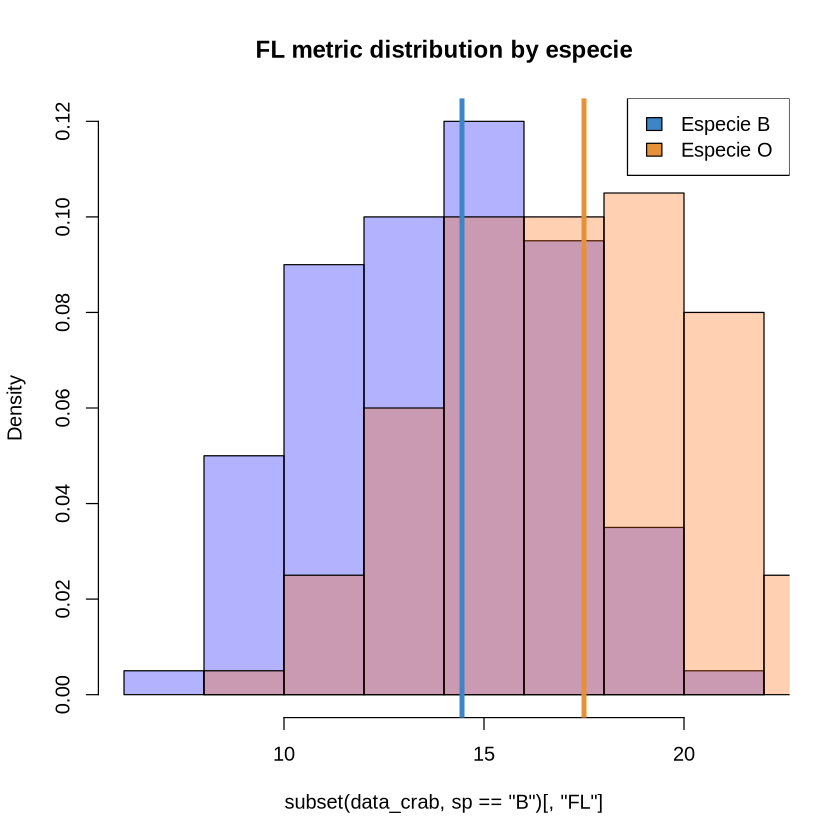

In [24]:
options(
  repr.plot.width = 7,
  repr.plot.height = 7
)
# Probabilistic hystogram with the 'FL' distribution by species
hist(subset(data_crab, sp == "B")[, "FL"],
  col = rgb(0, 0, 1, 0.3),
  main = "FL metric distribution by especie",
  freq = F
)
hist(subset(data_crab, sp == "O")[, "FL"],
  col = rgb(1, 0.4, 0, 0.3),
  add = T,
  freq = F
)

# Mediana 'FL' x species
abline(v = median(subset(data_crab, sp == "B")[, "FL"]), col = "#3d85c6", lwd = 4)
abline(v = median(subset(data_crab, sp == "O")[, "FL"]), col = "#e69138", lwd = 4)
legend(x = "topright", legend = c("Especie B", "Especie O"), fill = c("#3d85c6", "#e69138"))

Tenemos una herramienta que nos puede ayudar mucho para anticiparnos en detectar diferencias entre grupos >> **gráfico de violín:**

<div>
<p style = 'text-align:left;'>
<img src="https://datavizcatalogue.com/ES/metodos/images/anatomy/SVG/diagrama_de_violin.svg" alt="JuveYell" width="400px">
</p>
</div>

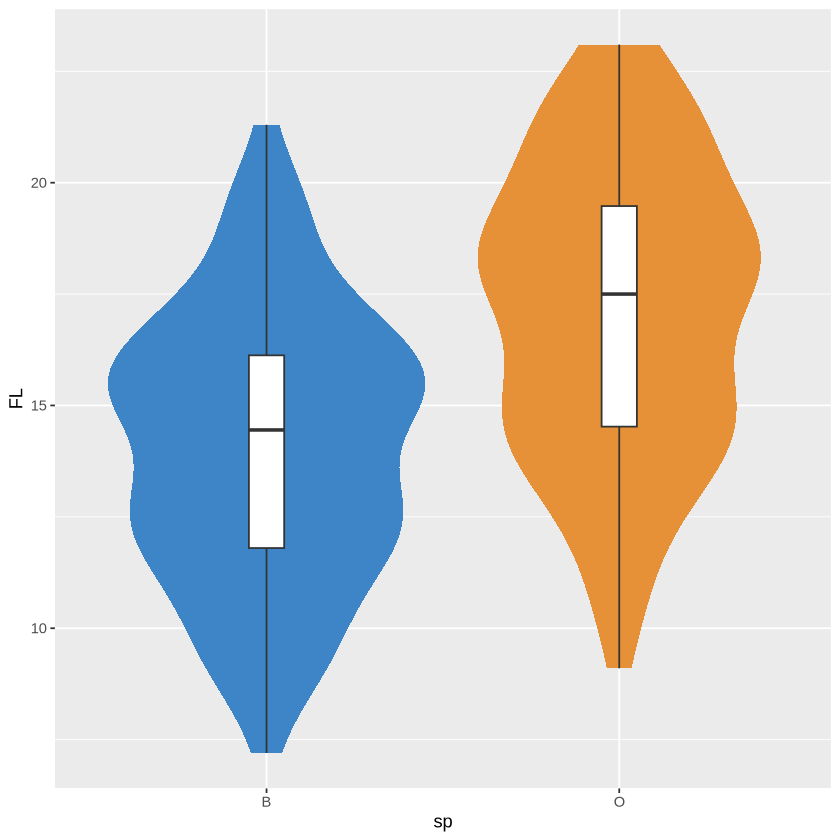

In [25]:
ggplot(data_crab, aes(sp, FL)) +
  geom_violin(color = NA, aes(fill = factor(sp))) +
  theme(legend.position = "none") +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c("B" = "#3d85c6", "O" = "#e69138"))

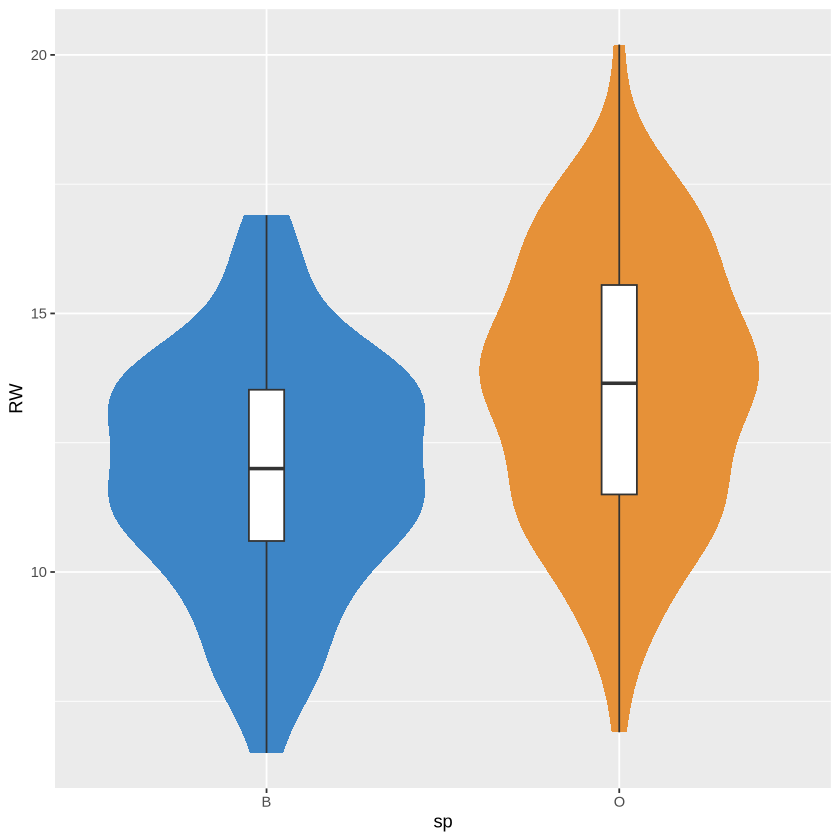

In [26]:
ggplot(data_crab, aes(sp, RW)) +
  geom_violin(color = NA, aes(fill = factor(sp))) +
  theme(legend.position = "none") +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c("B" = "#3d85c6", "O" = "#e69138"))

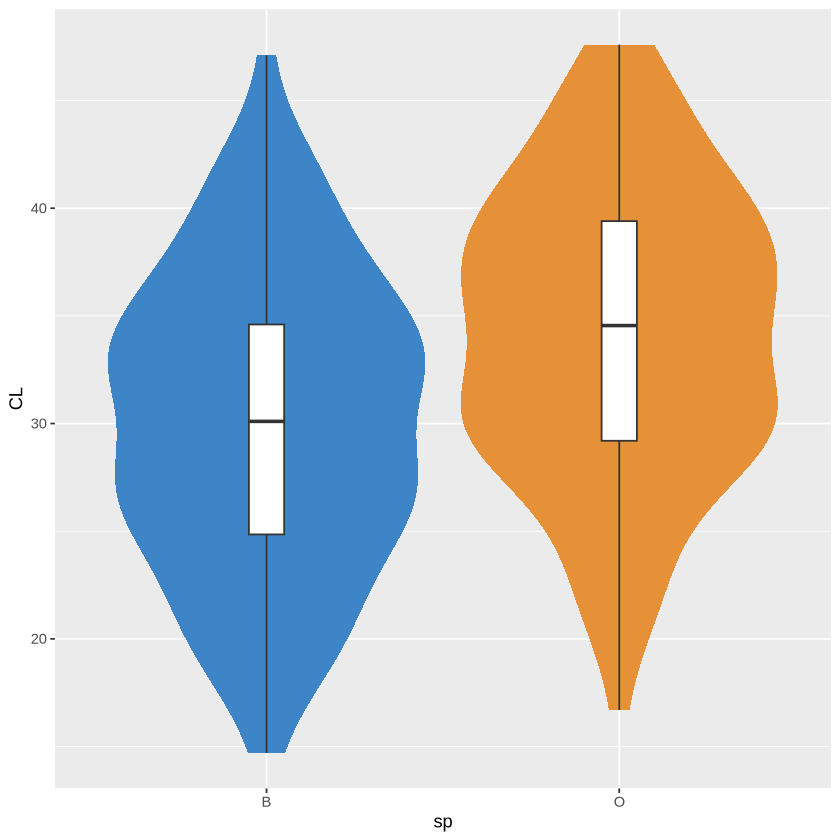

In [27]:
ggplot(data_crab, aes(sp, CL)) +
  geom_violin(color = NA, aes(fill = factor(sp))) +
  theme(legend.position = "none") +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c("B" = "#3d85c6", "O" = "#e69138"))

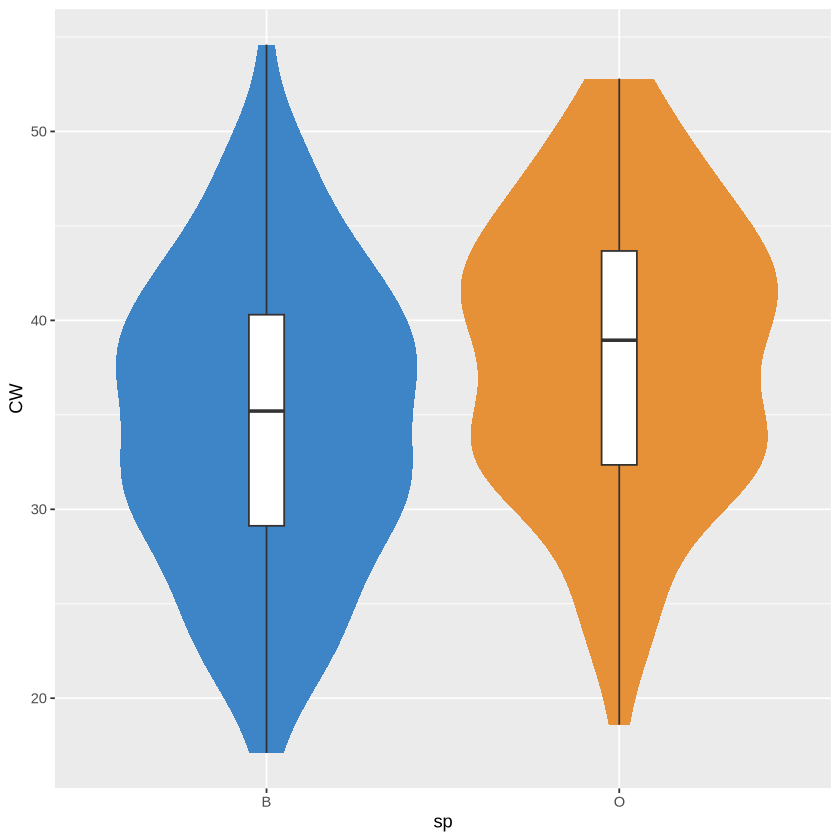

In [28]:
ggplot(data_crab, aes(sp, CW)) +
  geom_violin(color = NA, aes(fill = factor(sp))) +
  theme(legend.position = "none") +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c("B" = "#3d85c6", "O" = "#e69138"))

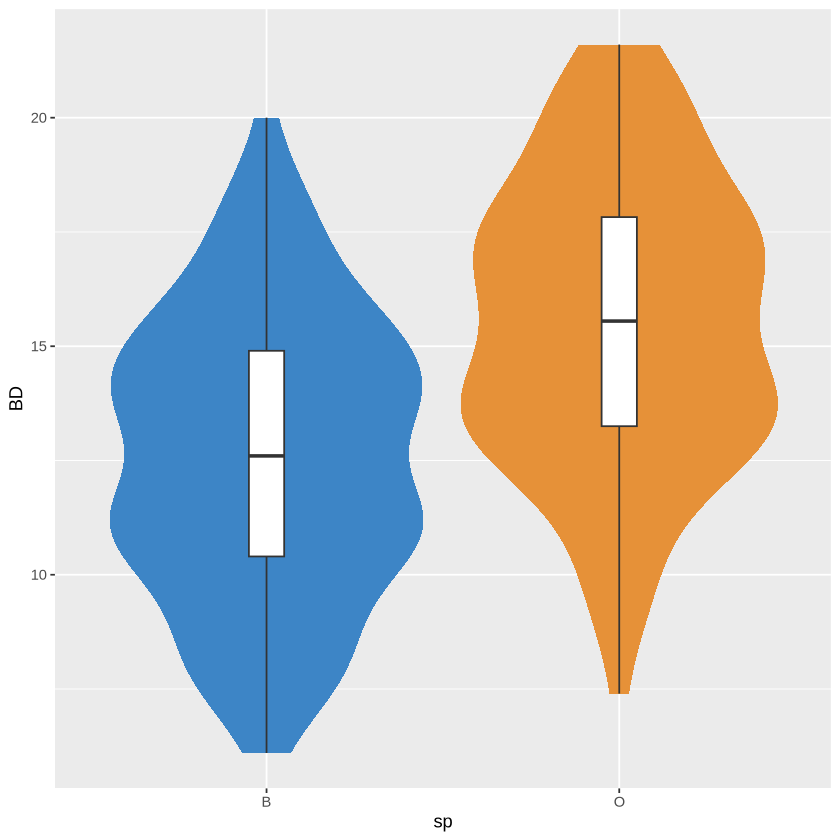

In [29]:
ggplot(data_crab, aes(sp, BD)) +
  geom_violin(color = NA, aes(fill = factor(sp))) +
  theme(legend.position = "none") +
  geom_boxplot(width = 0.1) +
  scale_fill_manual(values = c("B" = "#3d85c6", "O" = "#e69138"))

Pero como siempre decimos, siempre tenemos la pareja 'observación gráfica' & 'test':

- GRÁFICO DE VIOLÍN (o histograma superpuesto - con más de dos categorías menos práctico)
- ANOVA

In [30]:
anova <- aov(FL ~ sp, data = data_crab)
summary(anova)

             Df Sum Sq Mean Sq F value   Pr(>F)    
sp            1  466.3   466.3   46.99 8.84e-11 ***
Residuals   198 1964.9     9.9                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Este resultado nos indica con un p-valor < 0.05 que debemos rechazar nuestra hipótesis nula y por lo tanto hay diferencia significativa entre grupos. Si realizamos el anova para todo el conjunto de nuestras variables, vemos que rechazaríamos la hipótesis nula en todos los casos (ya nos podíamos adelantar a este hecho en el análisis de correlaciones, lo que aplicase a una variable aplicaría seguramente a todas)

In [31]:
resultados_anova <- data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables <- c("FL", "RW", "CL", "CW", "BD")
for (variable in variables) {
  formula <- as.formula(paste(variable, "~ sp"))
  anova_result <- aov(formula, data = data_crab)

  # Extraer F value y p-value
  f_value <- summary(anova_result)[[1]][["F value"]][1]
  p_value <- summary(anova_result)[[1]][["Pr(>F)"]][1]
  resultados_anova <- rbind(resultados_anova, data.frame(Variable = variable, F_Value = f_value, P_Value = p_value))
}

# Muestra los resultados de ANOVA
print(resultados_anova)

  Variable   F_Value      P_Value
1       FL 46.993047 8.841692e-11
2       RW 21.926326 5.252108e-06
3       CL 17.953498 3.467592e-05
4       CW  9.706938 2.108392e-03
5       BD 43.326752 4.059563e-10


### <font color='#3d59c6'>  4.2 One-Way MANOVA </font>

In [32]:
head(cbind(data_crab$FL, data_crab$RW, data_crab$CL, data_crab$CW, data_crab$BD))

[,1] [,2] [,3] [,4] [,5]
[1,]  8.1 6.7  16.1 19.0 7.0 
[2,]  8.8 7.7  18.1 20.8 7.4 
[3,]  9.2 7.8  19.0 22.4 7.7 
[4,]  9.6 7.9  20.1 23.1 8.2 
[5,]  9.8 8.0  20.3 23.0 8.2 
[6,] 10.8 9.0  23.0 26.5 9.8

In [33]:
manova <- manova(cbind(FL, RW, CL, CW, BD) ~ sp, data_crab)
summary(manova, test = "Wilks")

           Df   Wilks approx F num Df den Df    Pr(>F)    
sp          1 0.12679   267.22      5    194 < 2.2e-16 ***
Residuals 198                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nuestro output nos indica que hay evidencia significativa para afirmar que al menos una de las variables dependientes (FL, RW, CL, CW, BD) difiere entre las categorías del factor Especie

### <font color='#3d59c6'>  4.3 Two-Way ANOVA </font>

In [34]:
data_crab_two <- data_crab[, c("sp", "sex", "FL", "RW", "CL", "CW", "BD")]
head(data_crab_two)

sp sex FL   RW  CL   CW   BD 
1 B  M    8.1 6.7 16.1 19.0 7.0
2 B  M    8.8 7.7 18.1 20.8 7.4
3 B  M    9.2 7.8 19.0 22.4 7.7
4 B  M    9.6 7.9 20.1 23.1 8.2
5 B  M    9.8 8.0 20.3 23.0 8.2
6 B  M   10.8 9.0 23.0 26.5 9.8

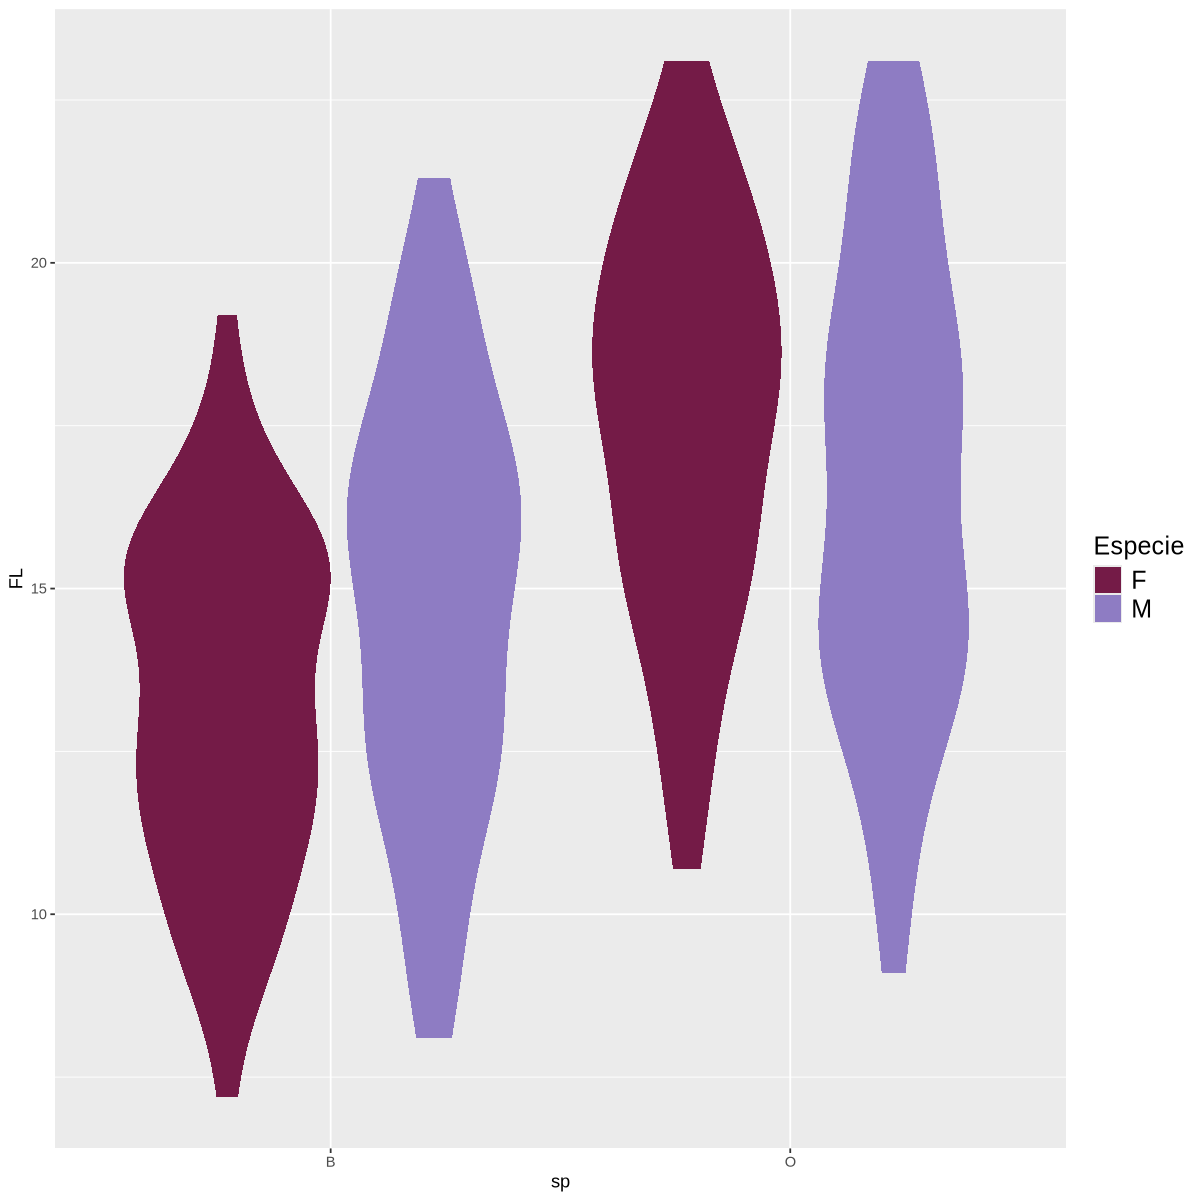

In [35]:
options(
  repr.plot.width = 10,
  repr.plot.height = 10
)
ggplot(data_crab_two, aes(sp, FL, fill = factor(sex))) +
  geom_violin(color = NA) +
  theme(
    legend.position = "right",
    legend.text = element_text(size = 15),
    legend.title = element_text(size = 15)
  ) +
  scale_fill_manual(values = c("F" = "#741b47", "M" = "#8e7cc3")) +
  labs(fill = "Especie")

In [36]:
anova <- aov(FL ~ sp * sex, data = data_crab)
summary(anova)

             Df Sum Sq Mean Sq F value   Pr(>F)    
sp            1  466.3   466.3  48.627 4.63e-11 ***
sex           1    4.6     4.6   0.476  0.49128    
sp:sex        1   80.6    80.6   8.409  0.00416 ** 
Residuals   196 1879.7     9.6                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

El resultado de nuestro Two-Way ANOVA nos confirma que la combinación de ambos factores/atributos influyen en las dimensiones de glóbulo frontal, sin embargo, es la variable 'especie' la que tiene mayor impacto. 'Sex' tiene un p-valor >0.05 lo que indica que no tiene impacto por si sola sobre las dimensiones de los lóbulos frontales de nuestros cangrejos.

In [37]:
resultados_anova_conjunto <- data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
resultados_anova_sp <- data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
resultados_anova_sex <- data.frame(Variable = character(), F_Value = numeric(), P_Value = numeric(), row.names = NULL)
variables <- c("FL", "RW", "CL", "CW", "BD")
for (variable in variables) {
  formula <- as.formula(paste(variable, "~ sp * sex"))
  anova_result <- aov(formula, data = data_crab)

  # Extraer F value y p-value
  f_value3 <- summary(anova_result)[[1]][["F value"]][3]
  p_value3 <- summary(anova_result)[[1]][["Pr(>F)"]][3]
  resultados_anova_conjunto <- rbind(resultados_anova_conjunto, data.frame(Variable = variable, F_Value = f_value3, P_Value = p_value3))
  f_value1 <- summary(anova_result)[[1]][["F value"]][1]
  p_value1 <- summary(anova_result)[[1]][["Pr(>F)"]][1]
  resultados_anova_sp <- rbind(resultados_anova_sp, data.frame(Variable = variable, F_Value = f_value1, P_Value = p_value1))
  f_value2 <- summary(anova_result)[[1]][["F value"]][2]
  p_value2 <- summary(anova_result)[[1]][["Pr(>F)"]][2]
  resultados_anova_sex <- rbind(resultados_anova_sex, data.frame(Variable = variable, F_Value = f_value2, P_Value = p_value2))
}

# Muestra los resultados de ANOVA
print("Resultados impacto de Especie & Género conjuntamente sobre las variables")
print(resultados_anova_conjunto)
print("Resultados impacto de Especie sobre las variables")
print(resultados_anova_sp)
print("Resultados impacto de Género sobre las variables")
print(resultados_anova_sex)

[1] "Resultados impacto de Especie & Género conjuntamente sobre las variables"
  Variable   F_Value      P_Value
1       FL  8.409051 0.0041596868
2       RW 11.184278 0.0009883659
3       CL  6.495818 0.0115787311
4       CW  7.941936 0.0053254092
5       BD  4.484096 0.0354722490
[1] "Resultados impacto de Especie sobre las variables"
  Variable  F_Value      P_Value
1       FL 48.62702 4.626989e-11
2       RW 25.33626 1.087125e-06
3       CL 18.58455 2.571914e-05
4       CW 10.05670 1.761988e-03
5       BD 44.30501 2.751275e-10
[1] "Resultados impacto de Género sobre las variables"
  Variable    F_Value      P_Value
1       FL  0.4755032 4.912819e-01
2       RW 21.6082774 6.132855e-06
3       CL  2.4637667 1.181121e-01
4       CW  1.1923529 2.761959e-01
5       BD  1.9864453 1.602977e-01


### <font color='#3d59c6'>  4.4 Two-Way MANOVA </font>

In [38]:
manova <- manova(
  cbind(FL, RW, CL, CW, BD) ~ sp * sex,
  data_crab
)
summary(manova, test = "Wilks")

           Df   Wilks approx F num Df den Df    Pr(>F)    
sp          1 0.12039  280.559      5    192 < 2.2e-16 ***
sex         1 0.22973  128.754      5    192 < 2.2e-16 ***
sp:sex      1 0.77150   11.373      5    192 1.269e-09 ***
Residuals 196                                             
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

El resultado de nuestro Two-Way MANOVA nos confirma que la combinación de ambos factores/atributos influyen en al menos una de las medidas tomadas a nuestros cangrejos, y tanto la variable 'especie' como la variable 'Sex' tiene un p-valor < 0.05 lo que indica que tienen impacto por si suelan sobre las dimensiones de nuestros cangrejos.

## <font color='#3d59c6'>  5. CONCLUSIONES </font>

El dataset se componía de un total de 200 registros (50 observaciones por cada combinación de especie y género). Durante la fase descriptiva se pudo observar que a nivel de distribución de observaciones por factores especies y género la distribución es balanceada. Además, nuestras variables continuas presentaban baja dispersión (media y mediana similares) y además mostraban tener distribución Normal.

La matriz de correlaciones nos señalaba que las variables continuas estaban altamente correlacionadas entre ellas.

Antes de iniciar los test ANOVA y MANOVA se comprobaron que se cumplían todos los supuestos:
- Normalidad
- Homocedasticidad
- Independencia de muestras

Al realizar el One-Way Anova se observa que las medias de las diferentes medidas tomadas de nuestros cangrejos son significativamente diferentes por Especie, Además se complementó el estudio realizando un Two-Way ANOVA donde vimos que nuestros 2 factores combinados afectan significativamente en los valores de mida de los cangrejos observados.
